# TRUMP, TWITTER, AND TEXT


In this project, we will work with Twitter data in order to analyze Donald Trump's tweets.

In [1]:
# Run this cell to set up the notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
import datetime

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

---
# Part I - Importing the Data

### I. 1) Unzip and load the data

Let's unzip and load the data into our notebook. The cell below unzips and reads tweets into a list named all_tweets.

In [2]:
path = 'data/hw3-realdonaldtrump_tweets.json.zip'

In [3]:
# Unzip the dataset
my_zip = zipfile.ZipFile(path, 'r')
with my_zip.open('hw3-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

Here is what a typical tweet from all_tweets looks like:

In [4]:
from pprint import pprint # to get a more easily-readable view.
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

### I. 2) Construct a Dataframe

Let's onstruct a DataFrame called trump containing data from all the tweets stored in all_tweets. The index of the DataFrame will be the ID of each tweet (looks something like 907698529606541312). It will have these columns:

- time: The time the tweet was created encoded as a datetime object.
- source: The source device of the tweet.
- text: The text of the tweet.
- retweet_count: The retweet count of the tweet.


Finally, the resulting DataFrame will be sorted by the index.

Warning: Some tweets will store the text in the text field and other will use the full_text field.

In [5]:
id_list = []
time_list = []
source_list = []
text_list = []
retweet_count_list = []

for i in all_tweets:
    id_list.append(i['id'])
    time_list.append(i['created_at'])
    source_list.append(i['source'])
    retweet_count_list.append(i['retweet_count'])
    if 'text' in i.keys():
        text_list.append(i['text'])
    else:
        text_list.append(i['full_text'])

trump = pd.DataFrame(index = id_list)
trump.index.names = ['tweet_ID']

trump['time'] = pd.to_datetime(time_list)
trump['source'] = source_list
trump['text'] = text_list
trump['retweet_count'] = retweet_count_list

trump = trump.sort_index()

trump.head()

,time,source,text,retweet_count
tweet_ID,,,,
690171032150237184,2016-01-21 13:56:11,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059
690171403388104704,2016-01-21 13:57:39,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339
690173226341691392,2016-01-21 14:04:54,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006
690176882055114758,2016-01-21 14:19:26,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266
690180284189310976,2016-01-21 14:32:57,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886


---
# Part II - Tweet Source Analysis

In the following steps, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [6]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

### II. 1) Cleaning the sources

Notice how sources like "Twitter for Android" or "Instagram" are surrounded by HTML tags. In the cell below, we will clean up the source field by removing the HTML tags from each source entry.

In [7]:
regex = r"<[^>]*>"

In [8]:
trump['source'] = trump['source'].str.replace(regex, "")
trump['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter for iPad', 'Media Studio',
       'Periscope', 'Twitter Ads', 'Twitter Media Studio'], dtype=object)

In the following plot, we see that there are two device types that are more commonly used than others.

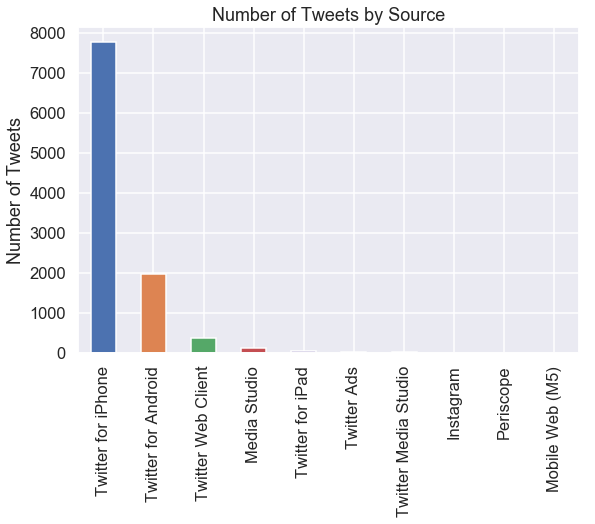

In [9]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

### II. 2) Devices over the time period

Now that we have cleaned up the source field, let's now look at which device Trump has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

In [10]:
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

In [11]:
trump.head()

,time,source,text,retweet_count,year
tweet_ID,,,,,
690171032150237184,2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059,2016.054645
690171403388104704,2016-01-21 13:57:39,Twitter for Android,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339,2016.054645
690173226341691392,2016-01-21 14:04:54,Twitter for Android,So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006,2016.054645
690176882055114758,2016-01-21 14:19:26,Twitter for Android,"Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266,2016.054645
690180284189310976,2016-01-21 14:32:57,Twitter for Android,Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886,2016.054645


Now, we will use sns.distplot to overlay the distributions of Trump's 2 most frequently used web technologies over the years.

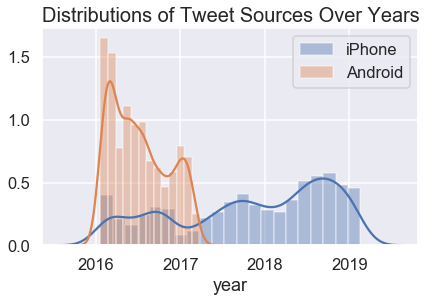

In [12]:
top_devices = trump['source'].value_counts().head(2).index

for device in top_devices:
    sns.distplot(trump.loc[trump['source'] == device, 'year'], label = device[12:])
    
plt.title('Distributions of Tweet Sources Over Years', fontsize=20)
plt.legend();

### II. 3) Android, iPhone, and time

Is there a difference between Trump's tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android device come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the +0000 in the first few tweets).

In [13]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [14]:
trump['est_time'] = (
    trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head(2)

,time,source,text,retweet_count,year,est_time
tweet_ID,,,,,,
690171032150237184,2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059,2016.054645,2016-01-21 08:56:11-05:00
690171403388104704,2016-01-21 13:57:39,Twitter for Android,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00


### II. 4) Time of the day

We add a column called hour to the trump table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [15]:
trump['hour'] = trump['est_time'].dt.hour + trump['est_time'].dt.minute/60 + trump['est_time'].dt.second/3600
trump.head(2)

,time,source,text,retweet_count,year,est_time,hour
tweet_ID,,,,,,,
690171032150237184,2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389
690171403388104704,2016-01-21 13:57:39,Twitter for Android,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833


### II. 5) Visualization

We use this data along with the seaborn distplot function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.

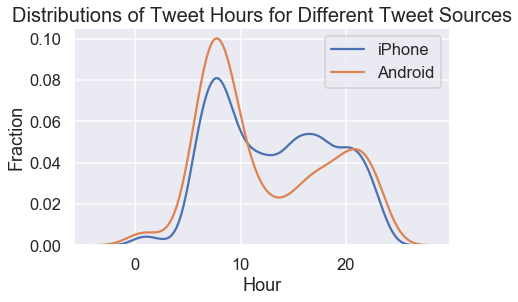

In [16]:
top_devices = trump['source'].value_counts().head(2).index

for device in top_devices:
    sns.distplot(trump.loc[trump['source'] == device, 'hour'], label = device[12:], hist = False)
    
plt.title('Distributions of Tweet Hours for Different Tweet Sources', fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Fraction')
plt.legend();

### II. 6) More insights of the data

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. We will create a figure similar to our figure from above, but this time, only use tweets that were tweeted before 2017.

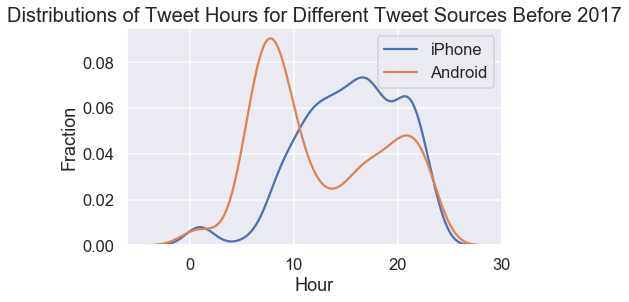

In [17]:
early_trump = trump[trump['year'] < 2017]

top_devices = early_trump['source'].value_counts().head(2).index

for device in top_devices:
    sns.distplot(early_trump[early_trump['source'] == device]['hour'], label = device[12:], hist=False)
    
plt.title('Distributions of Tweet Hours for Different Tweet Sources Before 2017', fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Fraction')
plt.legend();

### II. 7) Some conclusions

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff. 

Our figure shows that the Android tweets started earlier in the morning when Donald Trump is known to tweet, and when paid staff are unlikely to be posting.

---
# Part III - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [18]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### III. 1) From a lexicon to a DataFrame

As you can see, the lexicon contains emojis too! Each row contains a word and the polarity of that word, measuring how positive or negative the word is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

We read in the lexicon into a DataFrame called sent. The index of the DataFrame will be the words in the lexicon. The DataFrame will have one column named polarity, storing the polarity of each word.

In [19]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t', usecols=[0, 1], header=None, names=['token', 'polarity'],
                   index_col = 'token')
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


###  III. 2) Overall Sentiment

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, we find the sentiment of each word.
2. We calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

##### III. 2) a) Lowercase and punctuation

First, let's lowercase the text in the tweets since the lexicon is also lowercase.

In [20]:
trump['text'] = trump['text'].str.lower()

Now, let's get rid of punctuation since it will cause us to fail to match words. We create a new column called no_punc in the trump DataFrame to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character.

In [21]:
punct_re = r"[^a-z \n\d]"
trump['no_punc'] = (trump['text']).str.replace(punct_re,' ')
trump.head(2)

,time,source,text,retweet_count,year,est_time,hour,no_punc
tweet_ID,,,,,,,,
690171032150237184,2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389,bigop1 realdonaldtrump sarahpalinusa https t co 3kyqgqevyd
690171403388104704,2016-01-21 13:57:39,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833,americanaspie glennbeck sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border me too


##### III. 2) b) Tidy Format

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. We use the no_punc column of trump to create a table called tidy_format. The index of the table will be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. num: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. word: The individual words of each tweet.

In [22]:
DF = ((trump['no_punc']).str.split(expand=True)).stack().reset_index(level='tweet_ID')
DF.columns = ['tweet_ID','word']

tidy_format = pd.DataFrame(index=DF['tweet_ID'])
tidy_format['num'] = DF.index
tidy_format['word'] = DF['word'].values

tidy_format.head()

,num,word
tweet_ID,,
690171032150237184,0,bigop1
690171032150237184,1,realdonaldtrump
690171032150237184,2,sarahpalinusa
690171032150237184,3,https
690171032150237184,4,t


##### III. 2) c) Sentiment of each tweet

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

We add a polarity column to the trump table.  The polarity column will contain the sum of the sentiment polarity of each word in the text of the tweet. Notice, if certain words are not found in the sent table, we set their polarities to 0.

In [23]:
tidy_format_plus_sent = tidy_format.merge(sent, how='left', left_on='word', right_index=True).reset_index()

tidy_format_plus_sent.head()   

,tweet_ID,num,word,polarity
0,690171032150237184,0,bigop1,NaN
1,690171032150237184,1,realdonaldtrump,NaN
2,690171032150237184,2,sarahpalinusa,NaN
3,690171032150237184,3,https,NaN
4,690171032150237184,4,t,NaN


In [24]:
trump['polarity'] = tidy_format_plus_sent.loc[:, ['tweet_ID', 'polarity']].groupby('tweet_ID').sum().fillna(0)
trump.head(2)

,time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
tweet_ID,,,,,,,,,
690171032150237184,2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389,bigop1 realdonaldtrump sarahpalinusa https t co 3kyqgqevyd,0.0
690171403388104704,2016-01-21 13:57:39,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833,americanaspie glennbeck sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border me too,-2.6


Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, we run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [25]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [26]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

### III. 3) Distributions of sentiments

Now, let's try looking at the distributions of sentiments for tweets containing certain keywords.

In the cell below, create a single plot showing both the distribution of tweet sentiments for tweets containing nytimes, as well as the distribution of tweet sentiments for tweets containing fox.

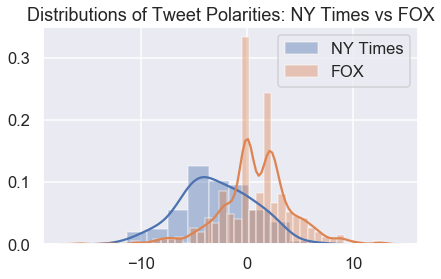

In [27]:
sns.distplot(trump.loc[trump['no_punc'].str.contains('nytimes'), ['polarity']], label = 'NY Times')
sns.distplot(trump.loc[trump['no_punc'].str.contains('fox'), ['polarity']], label = 'FOX')
plt.title('Distributions of Tweet Polarities: NY Times vs FOX')
plt.legend();

We notice that the president appears to say more positive things about Fox than the New York Times.